<a href="https://colab.research.google.com/github/xiaobo-fu/python_for_finance/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/python_for_finance/source/"
CHAPTER_ID = "python_for_finance"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import plt
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline
import random

In [0]:
pip install fxcmpy

In [0]:
import fxcmpy
token = open('/content/gdrive/My Drive/G/ML/python_for_finance/token.txt').read() 
con = fxcmpy.fxcmpy(access_token=token, log_level='error')

In [0]:
l = [random.randint(-1,1) for _ in range(10000)]
data = pd.DataFrame()
data['return'] = l
data['bid']=data['return'].cumsum()-0.1
data['ask']=data['return'].cumsum()+0.1
data['value'] = 0
#data.head()

global bidprice, askprice, bidposition, askposition
bidprice, askprice, bidposition, askposition = 0.0, 0.0, 0, 0
for i in range(10000):
    if bidposition != 0:
        if (bidprice - data['ask'][i] > 9) or (bidprice - data['ask'][i] <= -8):
            data['value'][i] += (bidprice - data['ask'][i])
            bidposition = 0
            #print('bid: %d' %(i), data['value'][i])
             
    if askposition != 0:
        if (data['bid'][i] - askprice > 9) or (data['bid'][i] - askprice <= -8):
            data['value'][i] += -(askprice - data['bid'][i])
            askposition = 0
            #print('ask: %d' %(i), data['value'][i])
                       
    if (bidposition == 0) and (askposition == 0):
        bidposition = 1
        askposition = 1
        bidprice = data['bid'][i]
        askprice = data['ask'][i]
        #print(i,bidprice)
        #print(data['bid'][i]*data['bid_p'][i])
        #data['bid_r'][i] = data['bid'][i]*data['bid_p'][i]
        #data['ask_r'][i] = data['ask'][i]*data['ask_p'][i]

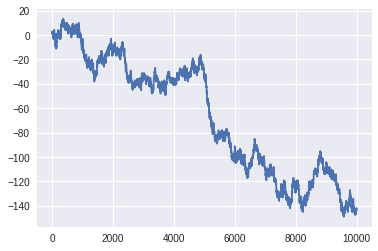

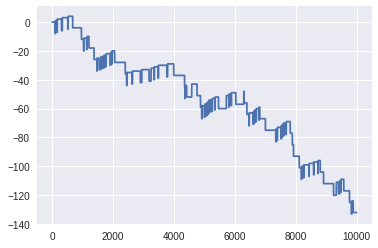

In [50]:
plt.plot(data['bid'])
plt.show()
plt.plot(data['value'].cumsum())